In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sbn
import sklearn

In [ ]:
path="/content/drive/MyDrive/1 - Carpeta/4 - IA/Colab de IA/Pruebas - Propias/wine.csv"
dataset=pd.read_csv(path)
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [ ]:
nan_row = dataset[dataset.isnull().any(1)]
nan_row

In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type


#Reg Lineal

In [ ]:
from sklearn.model_selection import train_test_split
import shap

In [ ]:
data_rl=dataset.drop(['alcohol','quality','type'],axis=1)
data_rl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
dtypes: float64(10)
memory usage: 507.7 KB


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data_rl, dataset.alcohol,test_size=0.3,random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(x_train, y_train) #Puedo agregar un hiperparametro para controlar la aceleración con n_samples

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
predict=reg.predict(x_test)
mean_squared_error(y_test, predict)

0.2720894700912934

In [ ]:
reg.score(x_train, y_train)

0.7844711306173924

In [ ]:
r2_score(y_test, predict)

0.8056743523686816

##Analisis x Shap

Introducción a Shap (Valores de Shap - Teoría de juegos): 

SHAP muestra la contribución o la importancia de cada feature en la predicción del modelo. 

La configuración es como sigue: una coalición de jugadores coopera, y obtiene una cierta ganancia general de la cooperación. Dado que algunos jugadores pueden contribuir más a la coalición que otros o pueden poseer diferente poder de negociación (por ejemplo, amenazando con destruir todo el excedente), ¿Qué reparto final de los beneficios de la cooperación entre los jugadores debemos esperar que surjan en cualquier juego en particular? O expresado de otra manera: ¿Qué importancia tiene cada jugador para la cooperación global, y qué recompensa puede él o ella razonablemente esperar? El valor de Shapley ofrece una posible respuesta a esta pregunta.

Manera no estandarizada

In [ ]:
#explicadores de SHAP
explainer1 = shap.explainers.Linear(reg, data_rl)
shap_values = explainer1(data_rl)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


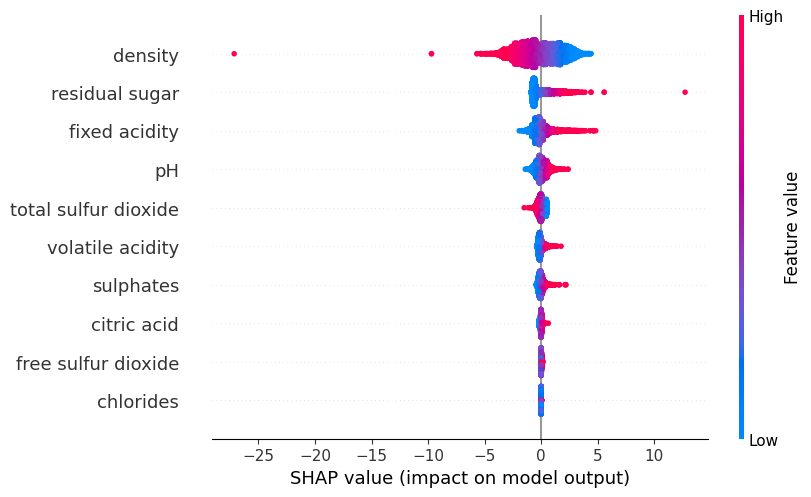

In [ ]:
shap.plots.beeswarm(shap_values)

No estandarizado

In [ ]:
data_rl_new=data_rl.drop(['chlorides','free sulfur dioxide'],axis=1)

In [ ]:
x_train_new, x_test_new, y_train_new, y_test_new = train_test_split(data_rl_new, dataset.alcohol,test_size=0.3,random_state=42)
reg_new=sklearn.linear_model.LinearRegression()
reg_new.fit(x_train_new,y_train_new)

LinearRegression()

In [ ]:
predict_new=reg_new.predict(x_test_new)
print("MSE :", mean_squared_error(y_test_new, predict_new),"\n")
print("R2 :" ,reg_new.score(x_train_new, y_train_new))

MSE : 0.271998912482329 

R2 : 0.7844189607306141


In [ ]:
r2_score(y_test_new,predict_new)

0.8057390283960341

##Conclusiones

En este caso, se intenta predecir una variable continua (Cantidad de alcohol) según las variables curadas (se eliminaron las que son de tipo categoricas como type y quality) 

Las metricas analizadas como error cuadratico medio y el score obtenidos antes del SHAP fueron las siguientes: 
```
mean_squared_error(y_test, predict)
0.2720894700912934

```

```
reg.score(x_train, y_train)
0.7844711306173924
```
Por parte del error cuadratico, su valor nominal es relativamente bajo (menor a la unidad y debe tener a 0). 
El score ideal es 1 y significa que el modelo ajusta perfectamente con los datos provistos. En este caso se acerca al 80%, por lo que para nosotros es un score satisfactorio. 
Posteriormente se analizan los SHAP value para hacer el modelo más eficiente.

Con el analisis de los SHAP value y el grafico acontinuación, las variables que menos aportan a que cambie el modelo son **free sulfure dioxide** y **chlorides**:


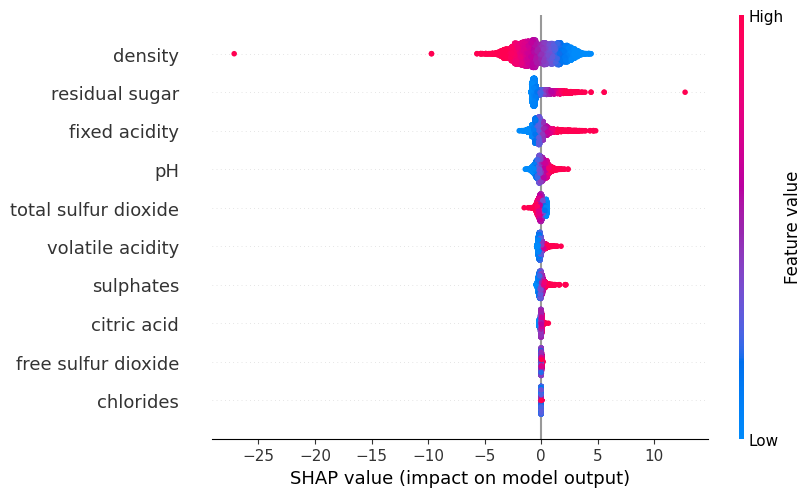

Se decidió descargar las ultimas 2 **features chlorides** y **free sulfur dioxide** y se entrenó el modelo lineal nuevamente con los mismos parametros: 
```
x_train_new, x_test_new, y_train_new, y_test_new = train_test_split(data_rl_new, dataset.alcohol,test_size=0.3,random_state=42)
```
Las metricas obtenidas no cambiaron a simple vista excepto el score el cual empeoró en el 5to decimal: 
```
predict_new=reg_new.predict(x_test_new)
print("MSE :", mean_squared_error(y_test_new, predict_new),"\n")
print("R2 :" ,reg_new.score(x_train_new, y_train_new))
```
```
OutPut
MSE : 0.271998912482329 
R2 : 0.7844189607306141
```
Para nosotros descartar 2 features y que el modelo empeore ligeramente (recién en el 5to decimal muestra cambios) es satisfactorio porque requiere menos recursos y la performance del modelo es practicamente la misma.




#Reg Logistica

In [ ]:
input=dataset.drop('type',axis=1)
input.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 609.2 KB


In [ ]:
target=dataset['type'].replace({'red': 1, 'white': 0})
target

0       1
1       1
2       1
3       1
4       1
       ..
6492    0
6493    0
6494    0
6495    0
6496    0
Name: type, Length: 6497, dtype: int64

In [ ]:
train_inputs, test_inputs, train_target, test_target= train_test_split(input, target, test_size= 0.2, random_state=42) 

In [ ]:
import sklearn
reglog=sklearn.linear_model.LogisticRegression(max_iter=1000)
reglog.fit(train_inputs, train_target)
pred= reglog.predict(test_inputs)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(test_target, pred)
accuracy

0.9792307692307692

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(test_target,pred)
cm  

array([[951,   8],
       [ 19, 322]])

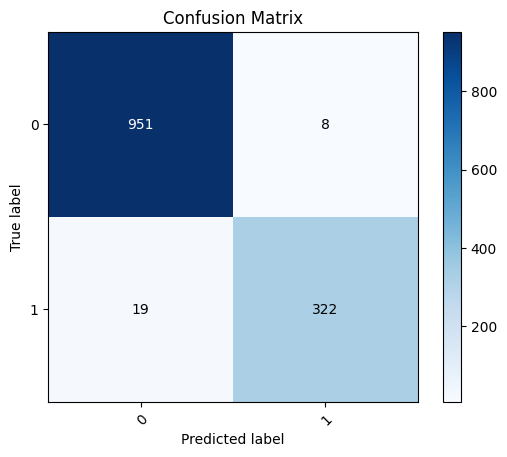

In [ ]:
import matplotlib.pyplot as plt

class_names = [str(i) for i in range(2)]

fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(0, 2),
       yticks=np.arange(0, 2),
       xticklabels=class_names, yticklabels=class_names,
       xlabel='Predicted label', ylabel='True label',
       title='Confusion Matrix',
       aspect='equal')
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data to create annotations
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm[i, j] > cm.max() / 2. else "black")

# Show plot
plt.show()


##Uso de SHAP x mejorar


In [ ]:
explainer1og = shap.explainers.Linear(reglog, input)
shap_values_log = explainer1og(input)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


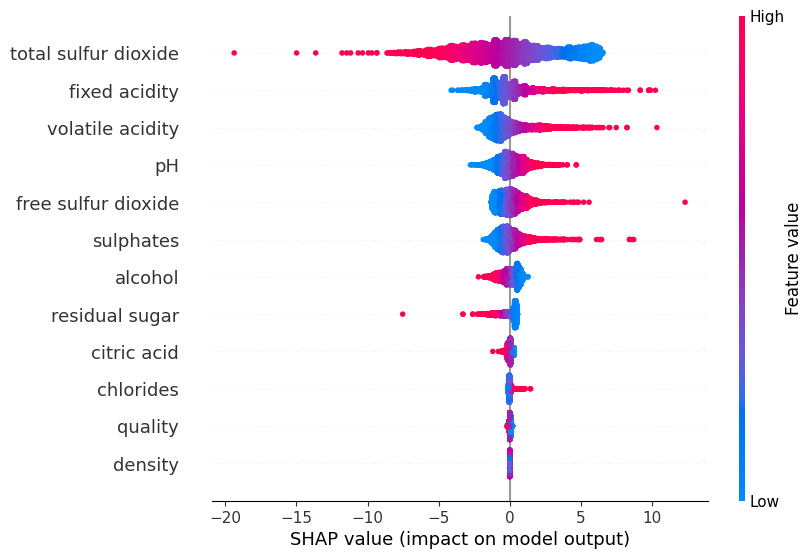

In [ ]:
shap.plots.beeswarm(shap_values_log,max_display=12)

In [ ]:
new_input=dataset.drop(['quality','density','type'],axis=1)

In [ ]:
train_inputs, test_inputs, train_target, test_target= train_test_split(new_input, target, test_size= 0.2, random_state=42) 

In [ ]:
new_reglog=sklearn.linear_model.LogisticRegression(max_iter=1000)
new_reglog.fit(train_inputs, train_target)
pred_new= new_reglog.predict(test_inputs)

In [ ]:
accuracy=accuracy_score(test_target, pred_new)
accuracy

0.98

In [ ]:
cm_new=confusion_matrix(test_target,pred_new)
cm_new

array([[952,   7],
       [ 19, 322]])

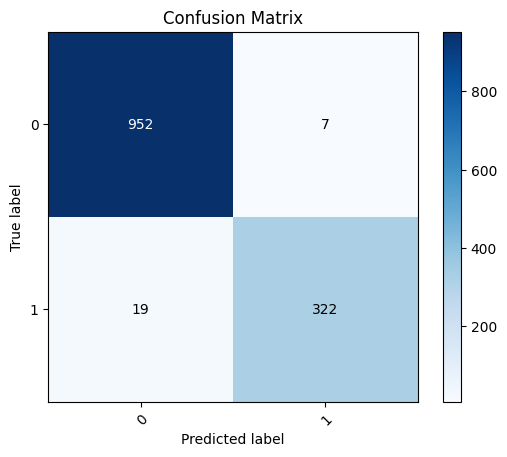

In [ ]:
import matplotlib.pyplot as plt

class_names = [str(i) for i in range(2)]

fig, ax = plt.subplots()
im = ax.imshow(cm_new, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(0, 2),
       yticks=np.arange(0, 2),
       xticklabels=class_names, yticklabels=class_names,
       xlabel='Predicted label', ylabel='True label',
       title='Confusion Matrix',
       aspect='equal')
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data to create annotations
for i in range(cm_new.shape[0]):
    for j in range(cm_new.shape[1]):
        ax.text(j, i, format(cm_new[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm[i, j] > cm_new.max() / 2. else "black")

# Show plot
plt.show()


##Conclusiones

En el ejemplo de regresión logística, el atributo target es dicotómica porque solo hay 2 opciones de tipos de vinos (tinto o blanco). 

En un primer instante se intentó realizar una relación entre las features y el target. 
Antes del SHAP, se entreno el modelo con las siguientes características en deafault: 
```
train_inputs, test_inputs, train_target, test_target= train_test_split(input, target, test_size= 0.2, random_state=:42) 
```

Las metricas finales de modelo fueron las siguientes:
```
accuracy = 0.9792307692307692
```
Matriz de confusión:
```
[951,   8]
[ 19, 322]
```
Con los datos de la diagonal principal de la CM y la precisión vemos que el modelo ajusta bastate bien al target planteado. 



Usando el SHAP vemos las importancias relativas de las features y se visualiza el orden de importancia de cada una de ellas y cómo impacta en el modelo. El fin de esto es descartar ciertas columnas para optimizar con menos recursos y si es posible, mejorar los valores de las metricas.

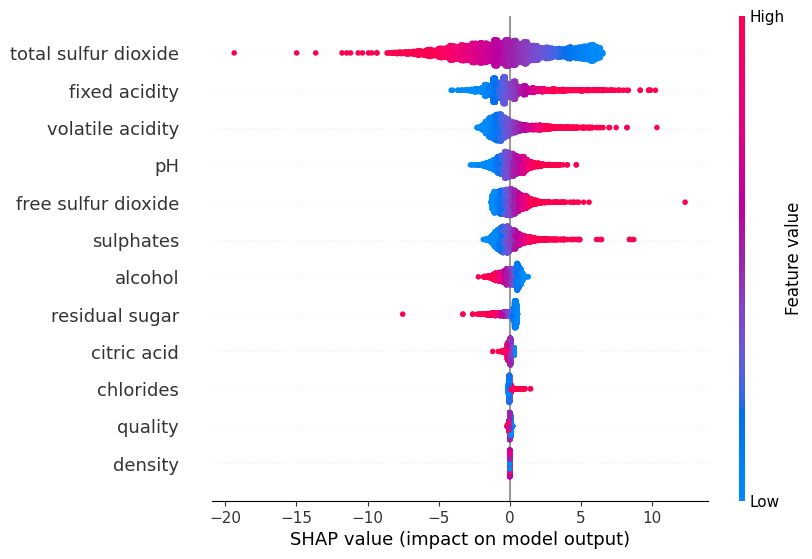

Se descarto **density** y **quality** para entrenar de vuelta el modelo. En este caso se busca usar menos recursos y obtener metricas similares o mejores. 

La accuracy mejoro en el 3er decimal: 
```
accuracy=0.98
```
mejor comparada con la anterior:
```
accuracy = 0.9792307692307692
```

Por parte de la matriz de confusión, la misma se conforma de la siguiente manera: 
```
CM=
[952,   7]
[ 19, 322]
```
La mejora se dio en un test pasando de Falso Negativo a Verdadero Negativo.



